In [9]:
#Libraries initialization
import numpy as np
import matplotlib.pyplot as plt
import random as r
import networkx as nx
import scipy.sparse as sp
from collections import defaultdict

In [32]:
#TASK 1
#Adjacency matrix initialization
matrix=np.zeros((100, 100))
n = 200

while n > 0:
    i = r.randint(0,99)
    j = r.randint(0,99)
    if i != j and matrix[i,j] != 1:
        matrix[i,j]=1
        matrix[j,i]=1
        n -= 1

print('Number of ones: ' + str(np.sum(matrix)))
print(matrix)

Number of ones: 400.0
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
#Adjacency matrix to adjacency list
adjlist = defaultdict(list)
edges = set()
for i, v in enumerate(matrix, 1):
    for j, u in enumerate(v, 1):
        if u != 0 and frozenset([i, j]) not in edges:
            edges.add(frozenset([i, j]))
            adjlist[i].append(j)
print (adjlist)

defaultdict(<class 'list'>, {1: [3, 31, 43, 45, 53, 54], 2: [10, 18, 19, 28, 39, 43, 57], 3: [7, 23, 31, 32, 59, 61, 74], 4: [20, 57, 62, 66], 5: [16, 48, 51, 77], 6: [90], 7: [31, 56], 8: [65], 9: [43, 63], 10: [65, 86, 92], 11: [43, 98], 12: [29, 53, 58, 86], 13: [14, 30, 96], 14: [17, 23, 38, 45, 47, 57, 61, 71, 85], 15: [35, 83, 84], 16: [40, 54, 71, 80, 82, 85, 100], 17: [28, 34, 88], 18: [34, 39, 56, 90], 19: [56, 57, 87], 20: [26, 28, 79], 21: [79], 22: [34, 72, 93], 23: [54, 61, 75, 78, 92, 100], 24: [60, 100], 25: [42, 51, 76], 26: [50, 66, 86], 27: [58, 64], 28: [54], 29: [45, 58, 66, 82, 85, 89], 30: [40, 78], 31: [73], 32: [37, 60], 33: [61, 68, 76, 94], 34: [50], 35: [69, 98], 36: [97], 37: [57, 79, 95], 38: [47, 81], 39: [73, 98], 41: [81, 83], 42: [52, 65], 43: [69], 44: [76], 45: [96], 46: [54, 66, 80], 47: [61, 93], 48: [50], 49: [66, 69, 85, 90], 50: [67, 79, 90, 91], 51: [78], 52: [75, 84, 92], 53: [95], 54: [60, 75], 55: [58], 56: [93, 94], 57: [58, 62, 81, 100], 58

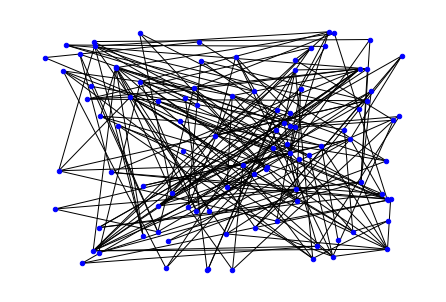

In [34]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()
edags = get_matrix_triad(matrix)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(matrix.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(matrix.shape[0])
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20)
plt.show()

In [85]:
#TASK 2
#Depth-ﬁrst search
visited = []

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        temp_nodes.append(node)
        visited.append(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
    return temp_nodes

all_components=[]
for i in range(1, 101):
    if i not in visited:
        temp_nodes=[]
        all_components.append(dfs(visited, adjlist, i))

print('Total number of unconnected components:', len(all_components), '.')
print('We visited', len(visited), '/ 100 elements.')
print('All components of the graph:\n', all_components)

Total number of unconnected components: 23 .
We visited 100 / 100 elements.
All components of the graph:
 [[1, 3, 7, 31, 73, 56, 93, 94, 23, 54, 60, 63, 80, 98, 91, 75, 61, 67, 71, 90, 99, 85, 92, 95, 89, 100, 78, 87, 32, 37, 57, 58, 69, 62, 64, 74, 81, 79, 59, 70, 76, 83, 86, 43, 45, 96, 53], [2, 10, 65, 18, 34, 50, 39, 19, 28], [4, 20, 26, 66, 82], [5, 16, 40, 48, 51, 77], [6], [8], [9], [11], [12, 29], [13, 14, 17, 88, 38, 47, 30], [15, 35, 84], [21], [22, 72], [24], [25, 42, 52], [27], [33, 68], [36, 97], [41], [44], [46], [49], [55]]


In [115]:
def bfs_sp(graph, start, goal):
    explored = []
    queue = [[start]]
    if start == goal:
        print("Start node = goal node")
        return
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    print('Shortest path between nodes', start, 'and', goal, '=', *new_path)
                    return
            explored.append(node)
    print("A connecting path doesn't exist for nodes", start, 'and', goal)
    return

bfs_sp(adjlist, 1, 80)
bfs_sp(adjlist, 1, 1)
bfs_sp(adjlist, 1, 2)

Shortest path between nodes 1 and 80 = 1 3 74 80
Start node = goal node
A connecting path doesn't exist for nodes 1 and 2
